In [1]:
import pandas as pd
data = pd.read_csv('./Social_Network_Ads.csv')

In [2]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape[0]

400

In [4]:
data = data[data['Gender']=='Female']
data.shape[0]

204

In [5]:
data = data.drop(columns=['Gender','User ID','Purchased'])

In [6]:
data.head()

,Age,EstimatedSalary
2,26,43000
3,27,57000
6,27,84000
7,32,150000
9,35,65000


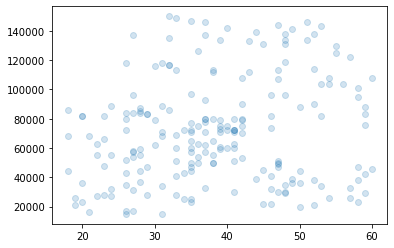

In [13]:
import matplotlib.pyplot as plt
x = np.array(data.values)
plt.scatter(x[:,0], x[:,1], alpha=0.2)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

In [15]:
print(pca.components_)

[[5.35532566e-05 9.99999999e-01]]


In [16]:
mean = np.mean(x.T, axis=1)
print("MEAN : ")
print(mean)
center = x - mean
co_var = np.cov(center.T)
print("Co-variance : ")
print(co_var)
e_values, e_vectors = np.linalg.eig(co_var)
print("Eigen values : ")
print(e_values)
print("Eigen vectors : ")
print(e_vectors)
considered_e_values = np.array(e_vectors[0])
print("Considered Eigen vector : ")
print(considered_e_values)
reduced = list()

MEAN : 
[3.84117647e+01 7.17598039e+04]
Co-variance : 
[[1.17918285e+02 6.78530861e+04]
 [6.78530861e+04 1.26702084e+09]]
Eigen values : 
[1.14284531e+02 1.26702084e+09]
Eigen vectors : 
[[-9.99999999e-01 -5.35532566e-05]
 [ 5.35532566e-05 -9.99999999e-01]]
Considered Eigen vector : 
[-9.99999999e-01 -5.35532566e-05]


In [17]:
x_pca = pca.transform(x)
print("original :   ",x.shape)
print("transformed :", x_pca.shape)

original :    (204, 2)
transformed : (204, 1)


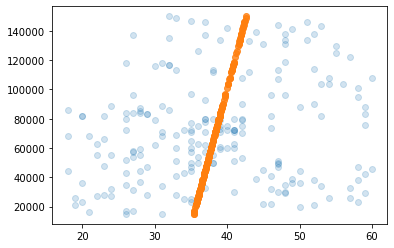

In [18]:
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)